In [1]:
# Load library
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
plt.style.use('ggplot')  # You can replace 'ggplot' with any available style name you prefer.
#plt.style.use('default')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle
import string
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPool1D, Dropout, Dense
from sklearn.model_selection import train_test_split



# # for data
# import pandas as pd
# import numpy as np

# # for visualization
# import matplotlib as mpl
# import seaborn as sns
# import matplotlib.pyplot as plt
# import missingno as msno
# import plotly.express as px
# import plotly.figure_factory as ff
# from plotly.subplots import make_subplots
# import plotly.graph_objs as go
# from wordcloud import WordCloud


# # nltk used for NLP
# import nltk
# from nltk.util import ngrams
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer

# # Preprocessing (sklearn)
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline

# # Modeling
# from sklearn.ensemble import RandomForestClassifier
# from lightgbm.sklearn import LGBMClassifier
# import xgboost as xgb
# from sklearn.svm import SVC
# from catboost import CatBoostClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# # Neural Network
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # scoring
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import roc_curve, RocCurveDisplay

# # styling
# plt.style.use('ggplot')


In [2]:
#Importing the SMS spam detection dataset

df = pd.read_csv("spam.csv", encoding='latin-1', sep=';')
df

,Column1,Column2,Column3,Column4,Column5
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  5572 non-null   object
 1   Column2  5572 non-null   object
 2   Column3  50 non-null     object
 3   Column4  12 non-null     object
 4   Column5  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Specify the columns to drop
columns_to_drop = ['Column3', 'Column4', 'Column5']

# Drop the columns from the DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)
df

,Column1,Column2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
#Also, we are renaming the column names for our convenience.

df.columns = ["SpamHam","Tweet"]
df.columns
df

,SpamHam,Tweet
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Turn spam/ham into numerical data, create new column called 'spam'
df['spam'] = df['SpamHam'].apply(lambda x: 1 if x == 'spam' else 0)
df

,SpamHam,Tweet,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SpamHam  5572 non-null   object
 1   Tweet    5572 non-null   object
 2   spam     5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [9]:
# Removing Duplicates
# Check for duplicates
print(df.duplicated().sum())

403


In [10]:
# Drop duplicates
df = df.drop_duplicates()
df.shape
df

,SpamHam,Tweet,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


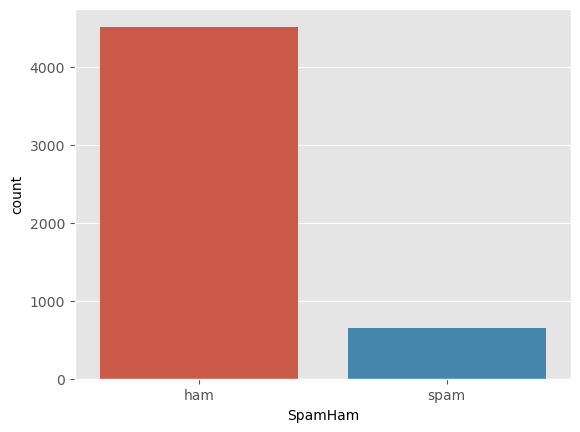

In [11]:
#Let’s plot the value counts of both spam and ham SMS.

counts = df["SpamHam"].value_counts()

sns.countplot(df, x="SpamHam")
#sns.countplot(df=counts.index)
plt.show()
# The number of ham messages is more than that of spam messages in the data.

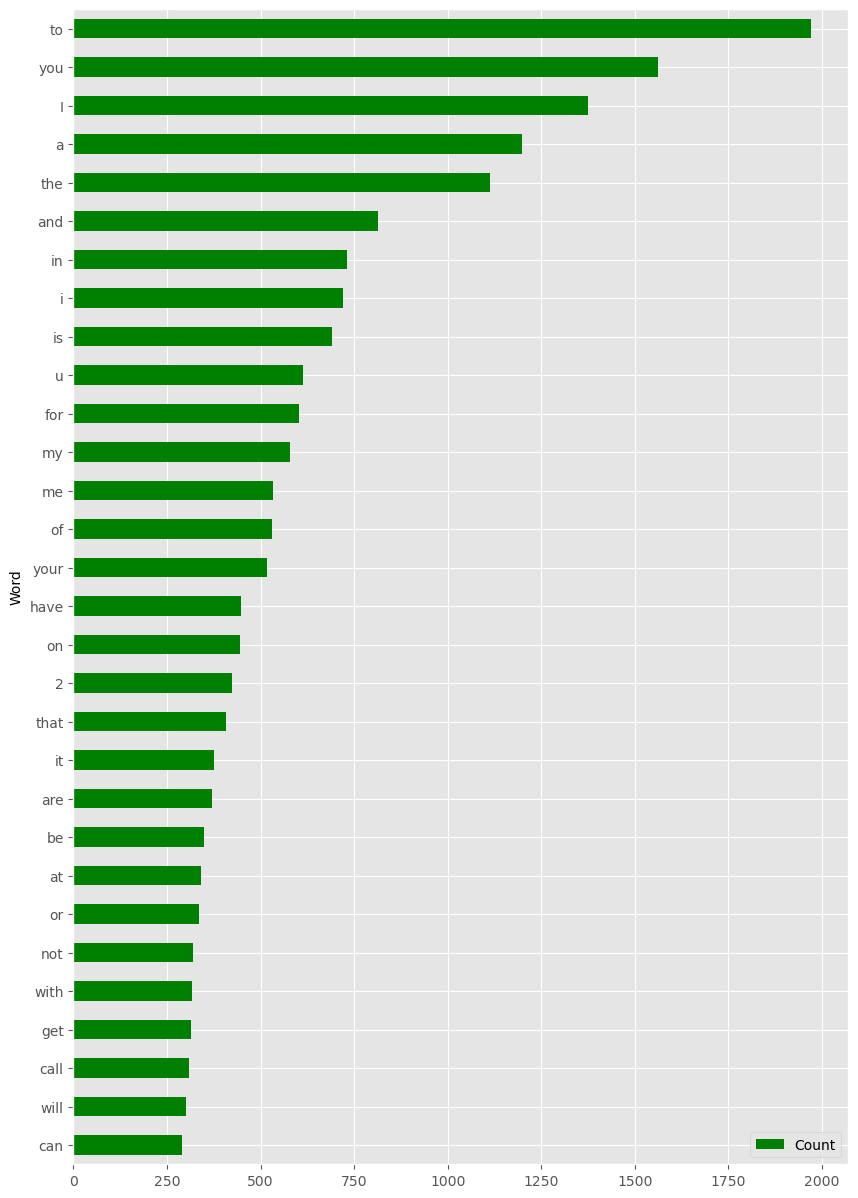

In [12]:
#Before doing the preprocessing techniques let’s plot the count of different words present in our dataset.
#For this, we are creating a function named word_count_plot.

def word_count_plot(data):
     # finding words along with count
     word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
     most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(data=df["Tweet"])

In [13]:
# Preprocessing
# 1. Convert text to lowercase
df['Tweet'] = df['Tweet'].str.lower()

# 2. Remove punctuation
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]', '')

# 3. Tokenization
df['Tweet'] = df['Tweet'].apply(nltk.word_tokenize)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
df['Tweet'] = df['Tweet'].apply(lambda x: [word for word in x if word not in stop_words])

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
df['Tweet'] = df['Tweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# 6. Join tokens back into text
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Tweet'])

# Print the vectorized features
print(vectorizer.get_feature_names_out())  # Use get_feature_names_out() instead of get_feature_names()
print(X.toarray())


['008704050406' '0089my' '0121' ... 'ûï' 'ûïharry' 'ûò']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
#As you can see most of the words are stopwords. So let’s do some preprocessing techniques on the dataset.

lem = WordNetLemmatizer()
def preprocessing(data):
      sms = contractions.fix(data) # converting shortened words to original (Eg:"I'm" to "I am")
      sms = sms.lower() # lower casing the sms
      sms = re.sub(r'https?://S+|www.' '\S+', "", sms).strip() #removing url
      sms = re.sub("[^a-z ]", "", sms) # removing symbols and numbes
      sms = sms.split() #splitting
      # lemmatization and stopword removal
      sms = [lem.lemmatize(word) for word in sms if not word in set (stopwords.words("english"))]
      sms = " ".join(sms)
      return sms
X = df["Tweet"].apply(preprocessing)


In [15]:
import re
import string  # Add this line to import the 'string' module

# Define the clean_text function
def clean_text(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # The 'string' module is now accessible.
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Assuming the DataFrame 'df' and column 'v2' are already defined
df['Tweet_clean'] = df['Tweet'].apply(clean_text)
df


,SpamHam,Tweet,spam,Tweet_clean
0,ham,go jurong point crazy available bugis n great ...,0,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,0,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1,free entry wkly comp win fa cup final tkts m...
3,ham,u dun say early hor u c already say,0,u dun say early hor u c already say
4,ham,nah dont think go usf life around though,0,nah dont think go usf life around though
...,...,...,...,...
5567,spam,2nd time tried 2 contact u u å750 pound prize ...,1,time tried contact u u pound prize claim e...
5568,ham,ì_ b going esplanade fr home,0,ì b going esplanade fr home
5569,ham,pity mood soany suggestion,0,pity mood soany suggestion
5570,ham,guy bitching acted like id interested buying s...,0,guy bitching acted like id interested buying s...


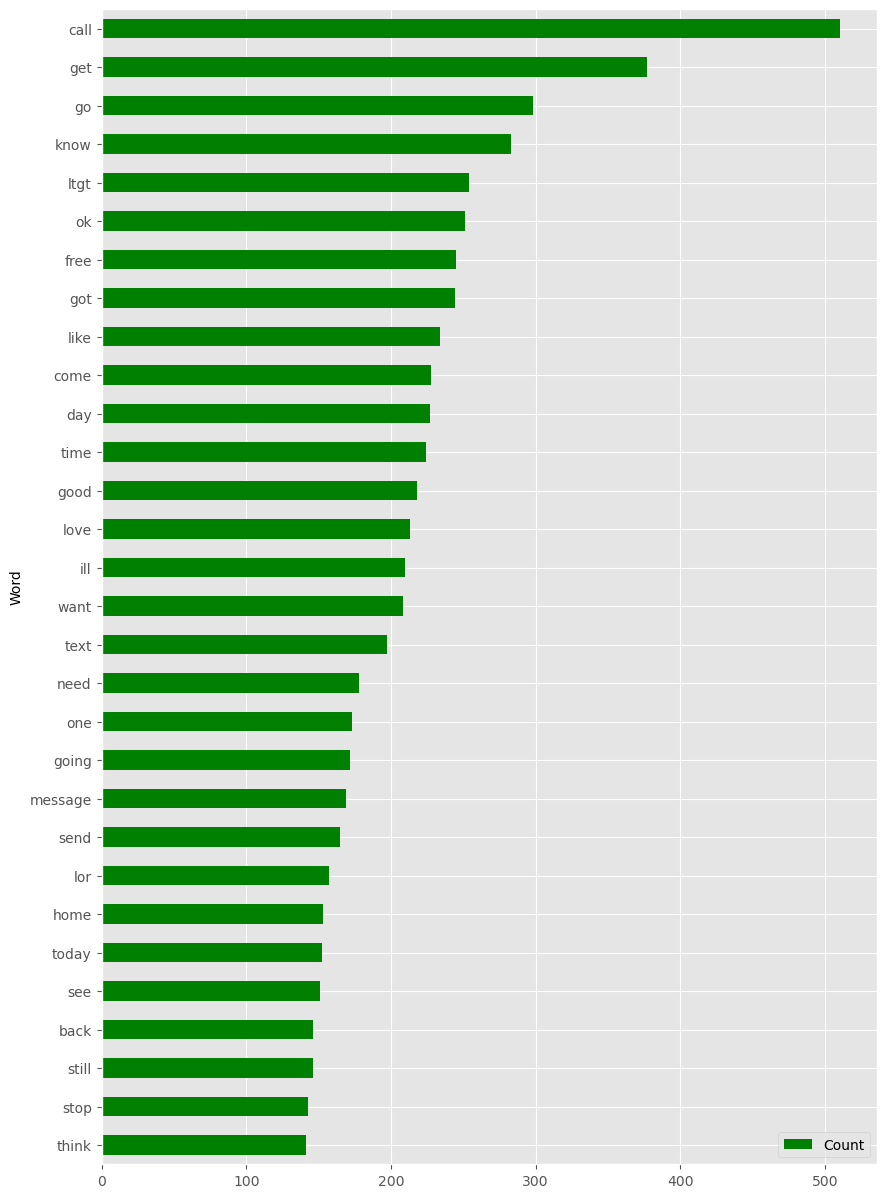

In [16]:
#We completed the data preprocessing techniques, now let’s plot the word count once again to see the most frequent words.

word_count_plot(X)

In [17]:
#Since our output values(Spam or Ham) are categorical values, we have to convert them into a numerical form. 
#So we are encoding this with LabelEncoder.

lb_enc = LabelEncoder()
y = lb_enc.fit_transform(df["SpamHam"])

df['SpamHam_encoded'] = lb_enc.transform(df['SpamHam'])
df

,SpamHam,Tweet,spam,Tweet_clean,SpamHam_encoded
0,ham,go jurong point crazy available bugis n great ...,0,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0,ok lar joking wif u oni,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1,free entry wkly comp win fa cup final tkts m...,1
3,ham,u dun say early hor u c already say,0,u dun say early hor u c already say,0
4,ham,nah dont think go usf life around though,0,nah dont think go usf life around though,0
...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u å750 pound prize ...,1,time tried contact u u pound prize claim e...,1
5568,ham,ì_ b going esplanade fr home,0,ì b going esplanade fr home,0
5569,ham,pity mood soany suggestion,0,pity mood soany suggestion,0
5570,ham,guy bitching acted like id interested buying s...,0,guy bitching acted like id interested buying s...,0


In [18]:
#We converted our output feature into numerical form, then, what about the input feature. 
#So, let’s convert the input feature into numerical form by using keras Tokenizer followed by padding.
#First, let’s tokenize our data and convert it into a numerical sequence using keras Tokenizer.

tokenizer = Tokenizer()  # initializing the tokenizer
tokenizer.fit_on_texts(X)  # fitting on the input feature data
text_to_sequence = tokenizer.texts_to_sequences(X)  # creating the numerical sequence

vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

7758


In [19]:
#Let’s look into some text and corresponding numerical sequence    

# Loop to print text and corresponding numerical sequence
for i in range(5):
    print("Text               : ", X[i])
    print("Numerical Sequence : ", text_to_sequence[i])

Text               :  go jurong point crazy available bugis n great world la e buffet cine got amore wat
Numerical Sequence :  [3, 3180, 241, 512, 543, 939, 39, 56, 302, 768, 81, 2169, 940, 8, 3181, 65]
Text               :  ok lar joking wif oni
Numerical Sequence :  [6, 198, 1075, 303, 1408]
Text               :  free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
Numerical Sequence :  [7, 388, 769, 770, 122, 2170, 941, 513, 2171, 181, 182, 17, 2170, 242, 388, 3182, 31, 3183, 304, 3184]
Text               :  dun say early hor c already say
Numerical Sequence :  [130, 53, 236, 2172, 72, 68, 53]
Text               :  nah think go usf life around though
Numerical Sequence :  [717, 30, 3, 663, 94, 112, 170]


In [20]:
#We can also find the index number of the corresponding words.

tokenizer.index_word # this will output a dictionary of index and words

{1: 'call',
 2: 'get',
 3: 'go',
 4: 'know',
 5: 'ltgt',
 6: 'ok',
 7: 'free',
 8: 'got',
 9: 'like',
 10: 'come',
 11: 'day',
 12: 'time',
 13: 'good',
 14: 'love',
 15: 'ill',
 16: 'want',
 17: 'text',
 18: 'need',
 19: 'one',
 20: 'going',
 21: 'message',
 22: 'send',
 23: 'lor',
 24: 'home',
 25: 'today',
 26: 'see',
 27: 'back',
 28: 'still',
 29: 'stop',
 30: 'think',
 31: 'txt',
 32: 'r',
 33: 'take',
 34: 'tell',
 35: 'reply',
 36: 'well',
 37: 'mobile',
 38: 'hi',
 39: 'n',
 40: 'da',
 41: 'new',
 42: 'phone',
 43: 'sorry',
 44: 'please',
 45: 'week',
 46: 'make',
 47: 'night',
 48: 'hey',
 49: 'thing',
 50: 'oh',
 51: 'tomorrow',
 52: 'much',
 53: 'say',
 54: 'cannot',
 55: 'na',
 56: 'great',
 57: 'give',
 58: 'hope',
 59: 'way',
 60: 'later',
 61: 'number',
 62: 'claim',
 63: 'happy',
 64: 'wan',
 65: 'wat',
 66: 'work',
 67: 'dear',
 68: 'already',
 69: 'friend',
 70: 'would',
 71: 'let',
 72: 'c',
 73: 'ask',
 74: 'yeah',
 75: 'pls',
 76: 'really',
 77: 'babe',
 78: 'righ

In [21]:
#This dict contains 7758 words which mean that our data contains 7758 unique words.

#As you can see in text_to_sequence, all the sequences are of different lengths which are not compatible for the model to train.
#So we should make all the sentences length equal. For this, we are padding the sequences with “0”.

max_length_sequence = max([len(i) for i in text_to_sequence])
 # finding the length of largest sequence
padded_sms_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence, 
                                    padding = "pre") 
padded_sms_sequence

#X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size = 0.2, random_state= 0)
#x_train, x_test, y_train, y_test = train_test_split(df.Text, df.spam, test_size = 0.25)

array([[   0,    0,    0, ...,    8, 3181,   65],
       [   0,    0,    0, ..., 1075,  303, 1408],
       [   0,    0,    0, ..., 3183,  304, 3184],
       ...,
       [   0,    0,    0, ..., 1387, 7756, 3178],
       [   0,    0,    0, ...,   45,  726,    7],
       [   0,    0,    0, ..., 1942,  415,  155]])

In [22]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Assuming the last column contains the target labels (spam or not spam)
# X = df.iloc[:, :-1]  # Features
# y = df.iloc[:, -1]   # Target labels

# # Encode string labels into numeric labels
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# # Encode categorical features
# for col in X.select_dtypes(include=['object']):
#     X[col] = label_encoder.fit_transform(X[col])

# # Define the number of splits (k)
# n_splits = 5

# # Initialize StratifiedKFold with desired number of splits
# stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Initialize an empty list to store accuracy scores
# accuracy_scores = []

# # Iterate through the splits
# for fold_idx, (train_indices, test_indices) in enumerate(stratified_kfold.split(X, y)):
#     print(f"Fold {fold_idx + 1}:")
    
#     # Get the training and test data for this fold
#     X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
#     y_train_fold, y_test_fold = y[train_indices], y[test_indices]
    
#     # Initialize RandomForestClassifier
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
    
#     # Train the model
#     model.fit(X_train_fold, y_train_fold)
    
#     # Make predictions on the test data
#     y_pred = model.predict(X_test_fold)
    
#     # Calculate accuracy for this fold
#     accuracy = accuracy_score(y_test_fold, y_pred)
#     print(f"Accuracy: {accuracy}")
    
#     # Store accuracy for this fold
#     accuracy_scores.append(accuracy)

# # Calculate and print the average accuracy across all folds
# average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# print(f"Average Accuracy: {average_accuracy}")


In [23]:
#We prepared the input data suitable for feeding into the model. 
#Now let’s create the LSTM model for training.    
    
#vocab_size = len(tokenizer.word_index)+1
def create_model():
    
      lstm_model = Sequential()
      lstm_model.add(Embedding(vocab_size, 32, input_length=max_length_sequence))
      lstm_model.add(LSTM(100))
      lstm_model.add(Dropout(0.4))
      lstm_model.add(Dense(20, activation="relu"))
      lstm_model.add(Dropout(0.3))
      lstm_model.add(Dense(1, activation = "sigmoid"))
      return lstm_model
lstm_model = create_model()
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 32)            248256    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 303497 (1.16 MB)
Trainable params: 303497 

In [24]:
#We created our LSTM model, so, let’s train our model with the input and output features created earlier.

#lstm_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)
#Both training accuracy(0.9998) and validation accuracy(0.9758) imply that our model is very good at predicting spam and ham SMS.

results = lstm_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)


Epoch 1/5
259/259 [==============================] - 7s 21ms/step - loss: 0.2288 - accuracy: 0.9313 - val_loss: 0.0629 - val_accuracy: 0.9787
Epoch 2/5
259/259 [==============================] - 5s 20ms/step - loss: 0.0526 - accuracy: 0.9881 - val_loss: 0.0614 - val_accuracy: 0.9807
Epoch 3/5
259/259 [==============================] - 5s 20ms/step - loss: 0.0222 - accuracy: 0.9956 - val_loss: 0.0737 - val_accuracy: 0.9797
Epoch 4/5
259/259 [==============================] - 5s 20ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 0.0960 - val_accuracy: 0.9836
Epoch 5/5
259/259 [==============================] - 5s 21ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.1196 - val_accuracy: 0.9720


In [25]:
# Evaluate the model on the test data.
eval_ = lstm_model.evaluate(padded_sms_sequence, y)
print(eval_[0], eval_[1]) # loss / accuracy


def plot_model(result):
    plot_model(results)

162/162 [==============================] - 1s 8ms/step - loss: 0.0251 - accuracy: 0.9940
0.025131898000836372 0.9940026998519897


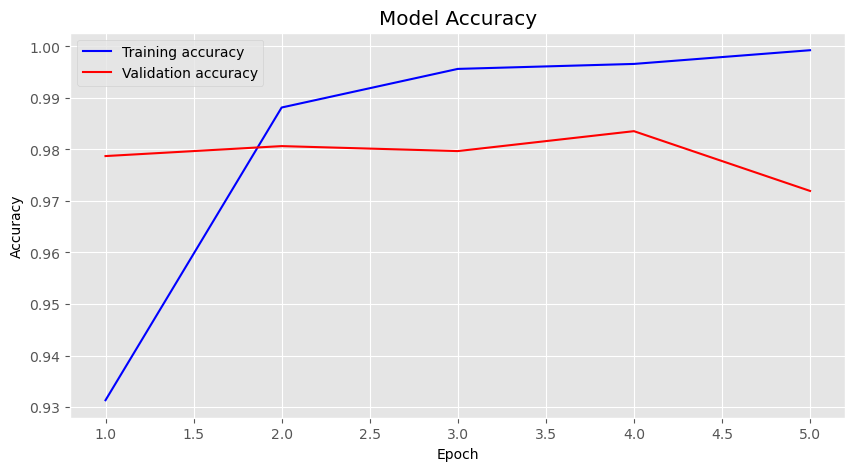

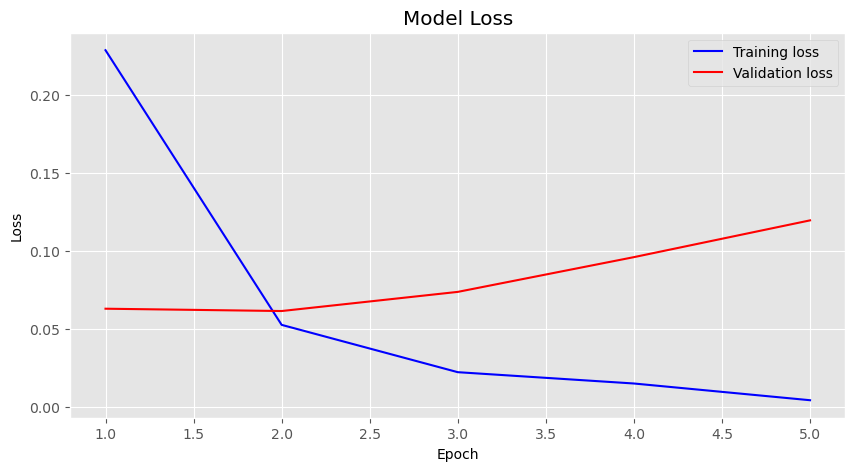

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

def plot_model(result):
    accuracy = result.history['accuracy']
    val_accuracy = result.history['val_accuracy']
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    x = range(1, len(accuracy) + 1)

    #plt.figure(figsize=(16, 10))
    
      # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

#     # First subplot: Model Accuracy
#     plt.subplot(2, 2, 1)
#     plt.plot(x, accuracy, 'b', label='Training')
#     plt.plot(x, val_accuracy, 'r', label='Validation')
#     plt.title('Model Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Second subplot: Training and Validation Accuracy
#     plt.subplot(2, 2, 2)
#     plt.plot(x, loss, 'b', label='Training accuracy')
#     plt.plot(x, val_loss, 'r', label='Validation accuracy')
#     plt.title('Training and Validation accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

#     # Third subplot: Model Loss
#     plt.subplot(2, 2, 3)
#     plt.plot(x, loss, 'b', label='Training')
#     plt.plot(x, val_loss, 'r', label='Validation')
#     plt.title('Model Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

#     # Fourth subplot: Training and Validation Loss
#     plt.subplot(2, 2, 4)
#     plt.plot(x, loss, 'b', label='Training loss')
#     plt.plot(x, val_loss, 'r', label='Validation loss')
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

    plt.tight_layout()  # To ensure the plots do not overlap
    plt.show()

# Assuming you have already trained your model and obtained the 'results' object
# Call the plot_model function with the 'results' object
plot_model(results)


162/162 [==============================] - 1s 8ms/step


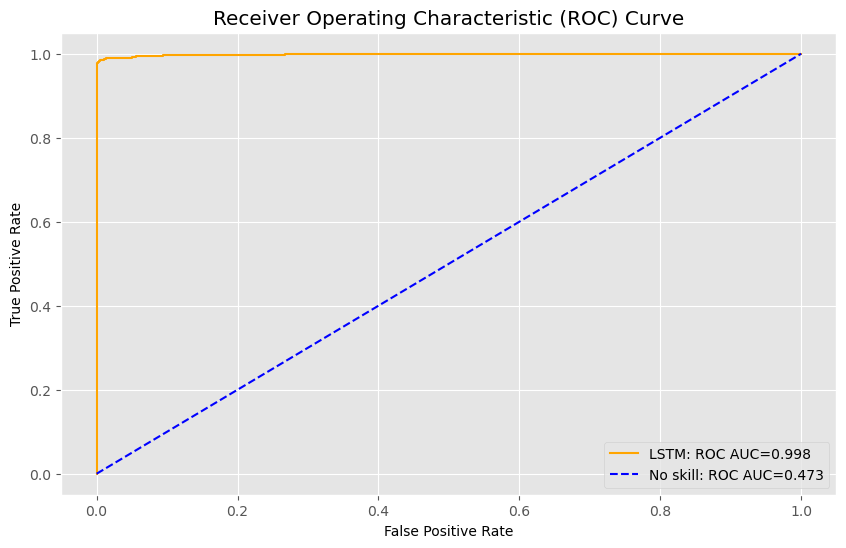

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Assuming you have a trained LSTM model and test data ready
# y_test should be the true labels for the test set
# X_test should be the input data for the test set

# Step 1: Predict probabilities using your LSTM model
y_pred_probs_lstm = lstm_model.predict(padded_sms_sequence)

# Step 2: Calculate the ROC curve
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y, y_pred_probs_lstm)

# Calculate the ROC AUC score for the LSTM model
lstm_auc = roc_auc_score(y, y_pred_probs_lstm)

# Define 'No Skill' probabilities where both classes are equally likely
ns_probs = np.linspace(0, 1, num=len(y))

# Calculate the ROC AUC score for the 'No Skill' model
ns_auc = roc_auc_score(y, ns_probs)

# Plot ROC curve for LSTM
plt.figure(figsize=(10, 6))
plt.plot(fpr_lstm, tpr_lstm, color='orange', label='LSTM: ROC AUC=%.3f' % (lstm_auc))
plt.plot(ns_probs, ns_probs, color='blue', linestyle='--', label='No skill: ROC AUC=%.3f' % (ns_auc))
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


In [28]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import plot_roc_curve
# # from sklearn.metrics import roc_auc_score
# from sklearn.metrics import RocCurveDisplay

# def cross_validate_Model(classifier, choice):
#     X = np.array(padded_sms_sequence)
#     Y = np.array(y)
#     X, Y = X[Y != 2], Y[Y != 2]
#     cv = StratifiedKFold(n_splits=20)
#     mean_fpr = np.linspace(0, 1, 100)
#     fig, ax = plt.subplots()
#     accruacy_scores_lst = []
#     tprs = []
#     aucs = []
#     class_repo_lst = []
#     acc_repo = []
#     conv_lst = []

#     for i, (train, test) in enumerate(cv.split(X, Y)):
#         vec = CountVectorizer()
#         X_train_list = X[train].tolist()  # Convert NumPy array to list of strings
#         training_data = vec.fit_transform(X_train_list)
#         testing_data = vec.transform(X[test])
#         classifier.fit(training_data, y[train])  # fitting algorithm
#         y_pred = classifier.predict(testing_data)  # getting predictions
#         accruacy_scores_lst.append(accuracy_score(y[test], y_pred))  # save all accuracies in list
#         repo = classification_report(y[test], y_pred, target_names=['Ham', 'Spam'])
#         class_repo_lst.append(repo)
#         acc_repo.append(float(repo[203:207]))  # get accuracy on spam
#         indx = acc_repo.index(max(acc_repo))
#         if choice == 'c':
#             conv_lst.append(confusion_matrix(y[test], y_pred))
#         if choice == 'r':
#             viz = plot_roc_curve(classifier, testing_data, y[test], name="", alpha=0.3, lw=1, ax=ax)
#             interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#             interp_tpr[0] = 0.0
#             tprs.append(interp_tpr)
#             aucs.append(roc_auc_score(y[test], y_pred))

#     if choice == 'r':
#         ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
#         mean_tpr = np.max(tprs, axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr)
#         std_auc = np.std(aucs)
#         ax.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)
#         print(class_repo_lst[indx])

#     if choice == 'c':
#         conv = conv_lst[indx]
#         sns.heatmap(conv, annot=True, annot_kws={"size": 16})
#         plt.show()

#     if choice == 'r':
#         ax.set(title="Maximum ROC curve after cross validation")
#         ax.get_legend().remove()
#         plt.show()

#     return "Max_Accuracy : " + str(round(np.array(accruacy_scores_lst).max(), 4)) + "%"


# # Assuming you have your data prepared
# # X = np.array(df.Text)
# # y = np.array(df.spam)

# X = np.array(padded_sms_sequence)
# Y = np.array(y)

# # Instantiate your LSTM model
# lstm_model = create_model()
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Apply cross-validation with LSTM model
# cross_validate_Model(lstm_model, 'r')  # 'r' for ROC curve

# # Apply cross-validation with LSTM model for Confusion Matrix
# cross_validate_Model(lstm_model, 'c')


In [29]:
# tprs = [] #ROC
# aucs = [] #AUC
# class_repo_lst = [] #Classification reports
# acc_repo = [] #accuracies
# conv_lst = [] #Confusion matrices
# accruacy_scores_lst = []

In [30]:
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from itertools import chain
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import RocCurveDisplay

# def cross_validate_Model(classifier, choice):
#     '''
#     parameters : 

#     1- classifier : Algorithm to train
#     2- choice : choose what you see.
#                 - 'r': Report classification & Roc_Curve
#                 - 'c': Confusion Matrix
#     '''
# # #We created our LSTM model, so, let’s train our model with the input and output features created earlier.

# # #lstm_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)
# # #Both training accuracy(0.9998) and validation accuracy(0.9758) imply that our model is very good at predicting spam and ham SMS.

# # results = lstm_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)

#     #----------Data------------------
#     X = np.array(padded_sms_sequence)
#     Y = np.array(y)
#     X, Y = X[Y != 2], Y[Y != 2]
#     #----------Variables-------------
#     cv = StratifiedKFold(n_splits=20)
#     mean_fpr = np.linspace(0, 1, 100)

#     #--------------------------------
#     fig, ax = plt.subplots()
    
#     #vec = CountVectorizer()
#     vec = CountVectorizer(lowercase=True, stop_words='english')

#     for i, (train, test) in enumerate(cv.split(X, Y)):
#         # Convert each element of X[train] to a string if it's not already one
#         X_train_list = [tokens.split() if isinstance(tokens, str) else str(tokens).split() for tokens in X[train]]
#         # Flatten the list of lists
#         X_train_list = list(chain.from_iterable(X_train_list))
#         # Convert each token list to a single space-separated string
#         X_train_list = [' '.join(tokens) for tokens in X_train_list]
#         # Concatenate the strings into a single document
#         training_data = ' '.join(X_train_list)
#         training_data = vec.fit_transform([training_data])  # Pass the single document as a list
#         testing_data = vec.transform(X[test])
#         classifier.fit(training_data, y[train])  # fitting algorithm

    
# #     for i, (train, test) in enumerate(cv.split(X, Y)):
# #         # Ensure X[train] is a list of lists of tokens
# #         X_train_list = [tokens.split() for tokens in X[train]]
# #         # Flatten the list of lists
# #         X_train_list = list(chain.from_iterable(X_train_list))
# #         # Convert each token list to a single space-separated string
# #         X_train_list = [' '.join(tokens) for tokens in X_train_list]
# #         # Concatenate the strings into a single document
# #         training_data = ' '.join(X_train_list)
# #         training_data = vec.fit_transform([training_data])  # Pass the single document as a list
# #         testing_data = vec.transform(X[test])
# #         classifier.fit(training_data, y[train])  # fitting algorithm
        
        
# #     for i, (train, test) in enumerate(cv.split(X, Y)):
# #         X_train_list = list(chain.from_iterable(X[train]))  # Flatten the list of lists
# #         # Convert each token list to a single space-separated string
# #         X_train_list = [' '.join(tokens) for tokens in X_train_list]
# #         # Concatenate the strings into a single document
# #         training_data = ' '.join(X_train_list)
# #         training_data = vec.fit_transform([training_data])  # Pass the single document as a list
# #         testing_data = vec.transform(X[test])
# #         classifier.fit(training_data, y[train])  # fitting algorithm

# #     for i, (train, test) in enumerate(cv.split(X, Y)):
# #         X_train_list = X[train].tolist()  # Convert NumPy array to list of strings
# #         # Concatenate the strings into a single document
# #         training_data = ' '.join(X_train_list)
# #         training_data = vec.fit_transform([training_data])  # Pass the single document as a list
# #         testing_data = vec.transform(X[test])
# #         classifier.fit(training_data, y[train])  # fitting algorithm

# #     for i, (train, test) in enumerate(cv.split(X, Y)):
# #         X_train_list = X[train].tolist()  # Convert NumPy array to list of strings
# #         training_data = vec.fit_transform(X_train_list)
# #         testing_data = vec.transform(X[test])
# #         classifier.fit(training_data, y[train])  # fitting algorithm

    
# #     vec = CountVectorizer()

# #     for i, (train, test) in enumerate(cv.split(X, Y)):

# #         training_data = vec.fit_transform(X[train])

# #         testing_data = vec.transform(X[test])

# #         classifier.fit(training_data, y[train])  # fitting algorithm

# #         y_pred = classifier.predict(testing_data)  # getting predictions

#         accruacy_scores_lst.append(accuracy_score(y[test], y_pred))  # save all accuracies in list

#         #=========================================================================
#         repo = classification_report(y[test], y_pred, target_names=['Ham','Spam'])
#         class_repo_lst.append(repo)
#         acc_repo.append(float(repo[203:207]))  # get accuracy on spam
#         indx = acc_repo.index(max(acc_repo))
#         #===========================================================================

#         if choice == 'c':
#             conv_lst.append(confusion_matrix(y[test], y_pred))

#         if choice == 'r':
#             #------plot-every-fold----------------------------------------------------------------------------------
#             viz = plot_roc_curve(classifier, testing_data, y[test], name="", alpha=0.3, lw=1, ax=ax)
#             #-------------------------------------------------------------------------------------------------------

#             interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#             interp_tpr[0] = 0.0

#             tprs.append(interp_tpr)
#             aucs.append(viz.roc_auc)

#     if choice == 'r':
#         #------plotting-AUC----------------------------------------------------------------
#         ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
#         #----------------------------------------------------------------------------------

#         mean_tpr = np.max(tprs, axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr)
#         std_auc = np.std(aucs)

#         #------plotting-ROC------------------------------------------------------------------------------------------------------
#         ax.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)
#         #-------------------------------------------------------------------------------------------------------------------------

#         print(class_repo_lst[indx])

#     if choice == 'c':
#         conv = conv_lst[indx]
#         sns.heatmap(conv, annot=True, annot_kws={"size": 16})
#         plt.show()

#     if choice == 'r':
#         ax.set(title="Maximum ROC curve after cross validation")
#         ax.get_legend().remove()
#         plt.show()

#     class_repo_lst.clear()
#     acc_repo.clear()
#     conv_lst.clear()

#     return "Max_Accuracy : " + str(round(np.array(accruacy_scores_lst).max(), 4)) + "%"


# # Assuming you have your data prepared
# # X = np.array(df.Text)
# # y = np.array(df.spam)

# X = np.array(padded_sms_sequence)
# Y = np.array(y)

# # Instantiate your LSTM model
# lstm_model = create_model()
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Apply cross-validation with LSTM model
# cross_validate_Model(lstm_model, 'r')  # 'r' for ROC curve

# # Apply cross-validation with LSTM model for Confusion Matrix
# cross_validate_Model(lstm_model, 'c')

# # SpamHam	Tweet

In [31]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_extraction.text import CountVectorizer

# class CVObject:
#     def __init__(self):
#         pass
    
#     def cross_validate_Model(self, model, X, y, choice='r'):
#         cv = StratifiedKFold(n_splits=5)  # You can adjust the number of splits
#         tprs = []
#         aucs = []
#         accuracies = []
#         class_reports = []
#         confusion_matrices = []
        
#         for train_idx, test_idx in cv.split(X, y):
#             X_train, X_test = X[train_idx], X[test_idx]
#             y_train, y_test = y[train_idx], y[test_idx]
            
#             # Preprocess text data if necessary
#             vec = CountVectorizer()
#             X_train_vec = vec.fit_transform(X_train)
#             X_test_vec = vec.transform(X_test)
            
#             # Train the model
#             model.fit(X_train_vec, y_train)
            
#             # Evaluate the model
#             y_pred = model.predict(X_test_vec)
#             accuracy = accuracy_score(y_test, y_pred)
#             accuracies.append(accuracy)
            
#             class_report = classification_report(y_test, y_pred)
#             class_reports.append(class_report)
            
#             confusion_matrix_ = confusion_matrix(y_test, y_pred)
#             confusion_matrices.append(confusion_matrix_)
            
#             # ROC curve
#             fpr, tpr, _ = roc_curve(y_test, y_pred)
#             roc_auc = auc(fpr, tpr)
#             tprs.append(tpr)
#             aucs.append(roc_auc)
            
#         if choice == 'r':
#             # Plot ROC curve
#             mean_tpr = np.mean(tprs, axis=0)
#             mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)
#             plt.plot(np.linspace(0, 1, 100), mean_tpr, 'b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
#             plt.plot([0, 1], [0, 1], 'r--')
#             plt.xlabel('False Positive Rate')
#             plt.ylabel('True Positive Rate')
#             plt.title('ROC Curve')
#             plt.legend()
#             plt.show()
            
#         if choice == 'c':
#             # Plot confusion matrix
#             mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
#             sns.heatmap(mean_confusion_matrix, annot=True, fmt='d', cmap='Blues')
#             plt.xlabel('Predicted label')
#             plt.ylabel('True label')
#             plt.title('Confusion Matrix')
#             plt.show()
            
#         return {
#             'mean_accuracy': np.mean(accuracies),
#             'class_reports': class_reports,
#             'confusion_matrices': confusion_matrices,
#             'roc_auc_scores': aucs
#         }

# # Assuming you have your data prepared
# # X = np.array(df.Text)
# # y = np.array(df.spam)
# X = np.array(padded_sms_sequence)
# Y = np.array(y)

# # Instantiate CVObject
# cv_object_instance = CVObject()

# # Create and compile your LSTM model
# lstm_model = create_model()
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Apply cross-validation with LSTM model
# cv_results = cv_object_instance.cross_validate_Model(lstm_model, X, y, choice='r')  # 'r' for ROC curve

# # Print mean accuracy
# print("Mean Accuracy:", cv_results['mean_accuracy'])

# # Access other performance metrics such as class-wise reports, confusion matrices, ROC AUC scores from cv_results


In [32]:
pad = 'post' 
max_len = 25
embedding_size = 100
batch_size = 20
sequences = pad_sequences(padded_sms_sequence, maxlen=max_len, padding=pad, truncating=pad)
sequences.shape

(5169, 25)

In [33]:
# CNN MODEL
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D

# Build the CNN model
def create_model():

        cnn_model = Sequential()
        # cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
        cnn_model.add(Embedding(vocab_size, 32, input_length=max_length_sequence))
        cnn_model.add(Conv1D(128, 3, activation='relu'))
        cnn_model.add(MaxPool1D(3))
        cnn_model.add(Dropout(0.2))
        cnn_model.add(Conv1D(128, 3, activation='relu'))
        cnn_model.add(GlobalMaxPooling1D())
        cnn_model.add(Dropout(0.2))
        cnn_model.add(Dense(64, activation='relu'))
        cnn_model.add(Dropout(0.2))
        cnn_model.add(Dense(32, activation='relu'))
        cnn_model.add(Dropout(0.2))
        cnn_model.add(Dense(units=1, activation='sigmoid'))
        return cnn_model
cnn_model = create_model()
# Compile the model.
cnn_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 32)            248256    
                                                                 
 conv1d (Conv1D)             (None, 77, 128)           12416     
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 128)           0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 25, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 128)           49280     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                      

In [34]:
#We created our CNN model, so, let’s train our model with the input and output features created earlier.

#cnn_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)
#Both training accuracy(0.9998) and validation accuracy(0.9758) imply that our model is very good at predicting spam and ham SMS.

#cnn_results = cnn_model.fit(x_train, y_train, batch_size = batch_size, epochs=n_epochs, validation_split=0.2, verbose=1)
cnn_results = cnn_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)


Epoch 1/5
259/259 [==============================] - 2s 5ms/step - loss: 0.2977 - accuracy: 0.9045 - val_loss: 0.0822 - val_accuracy: 0.9758
Epoch 2/5
259/259 [==============================] - 1s 4ms/step - loss: 0.0714 - accuracy: 0.9819 - val_loss: 0.0776 - val_accuracy: 0.9758
Epoch 3/5
259/259 [==============================] - 1s 4ms/step - loss: 0.0262 - accuracy: 0.9940 - val_loss: 0.1295 - val_accuracy: 0.9758
Epoch 4/5
259/259 [==============================] - 1s 4ms/step - loss: 0.0201 - accuracy: 0.9961 - val_loss: 0.1234 - val_accuracy: 0.9671
Epoch 5/5
259/259 [==============================] - 1s 4ms/step - loss: 0.0127 - accuracy: 0.9978 - val_loss: 0.2057 - val_accuracy: 0.9555


162/162 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9874
0.054364852607250214 0.9874250292778015


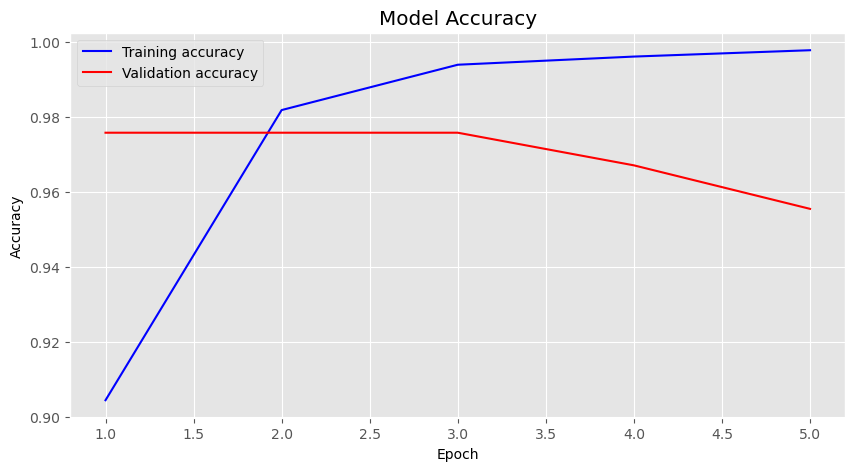

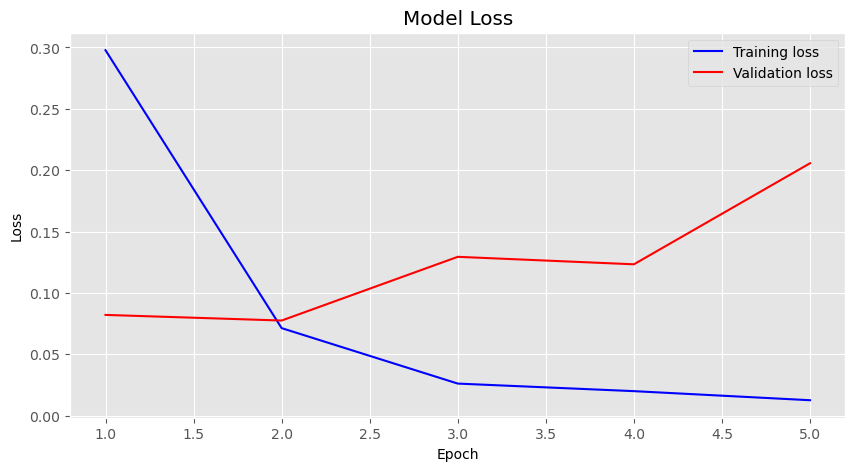

<Figure size 640x480 with 0 Axes>

In [35]:
# Evaluate the model on the test data.
eval_ = cnn_model.evaluate(padded_sms_sequence, y)
print(eval_[0], eval_[1]) # loss / accuracy

plot_model(cnn_results)

162/162 [==============================] - 0s 2ms/step


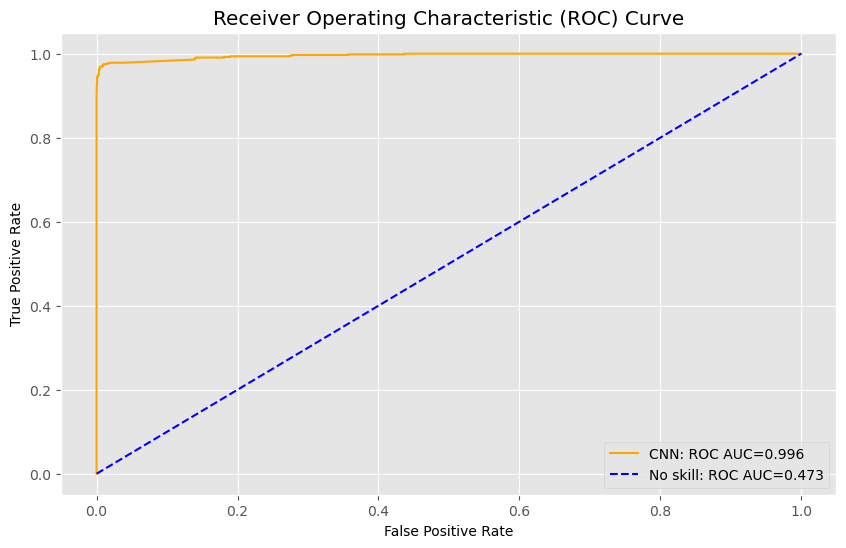

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming you have a trained CNN model and test data ready
# y_test should be the true labels for the test set
# X_test should be the input data for the test set

# Step 1: Predict probabilities using your CNN model
y_pred_probs_cnn = cnn_model.predict(padded_sms_sequence)

# Step 2: Calculate the ROC curve
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y, y_pred_probs_cnn)

# Calculate the ROC AUC score for the CNN model
cnn_auc = roc_auc_score(y, y_pred_probs_cnn)

# Define 'No Skill' probabilities where both classes are equally likely
ns_probs = np.linspace(0, 1, num=len(y))

# Calculate the ROC AUC score for the 'No Skill' model
ns_auc = roc_auc_score(y, ns_probs)

# Plot ROC curve for CNN
plt.figure(figsize=(10, 6))
plt.plot(fpr_cnn, tpr_cnn, color='orange', label='CNN: ROC AUC=%.3f' % (cnn_auc))
plt.plot(ns_probs, ns_probs, color='blue', linestyle='--', label='No skill: ROC AUC=%.3f' % (ns_auc))
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


In [ ]:
#We can save our model and tokenizer for future uses as a pickle file.

# pickle.dump(tokenizer, open("sms_spam_tokenizer.pkl", "wb"))
# pickle.dump(lstm_model, open("lstm_model.pkl", "wb"))